In [27]:
from json_repair import repair_json, loads

gym_stats = "/home/luisamao/booster_robocup/gym_stats3.json"

# Read file as string
with open(gym_stats, 'r') as f:
    raw_text = f.read()

# Repair and parse JSON
fixed_data = loads(raw_text)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def plot_actions(actions, actions2=None, name = None):
    actions = np.array(actions, dtype=float)  # shape: (n_steps1, n_actions)
    n_steps1, n_actions = actions.shape

    if actions2 is not None:
        actions2 = np.array(actions2, dtype=float)
        n_steps2 = actions2.shape[0]

    # grid layout
    n_cols = int(np.ceil(np.sqrt(n_actions)))
    n_rows = int(np.ceil(n_actions / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2*n_rows), sharex=True)
    axes = axes.flatten()

    for i in range(n_actions):
        # Plot actions
        time1 = np.arange(actions.shape[0])
        axes[i].plot(time1, actions[:, i], label="actions1")

        # Plot actions2 if provided
        if actions2 is not None:
            time2 = np.arange(actions2.shape[0])
            min_len = min(len(time1), len(time2))
            # plot overlapping part
            axes[i].plot(time2[:min_len], actions2[:min_len, i], label="actions2", linestyle="--")
            # plot remaining part if actions2 is longer
            if len(time2) > min_len:
                axes[i].plot(time2[min_len:], actions2[min_len:, i], linestyle="--", color="orange")

        axes[i].set_title(f"Action {i}", fontsize=10)
        axes[i].set_xlabel("Step")
        axes[i].set_ylabel("Value")
        axes[i].grid(True)
        if actions2 is not None:
            axes[i].legend(fontsize=8)

    # hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    name = name or "plot"
    fig.suptitle(name, fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # leave room for suptitle
    plt.savefig(name)
    print("saved to", name)


In [29]:
d = fixed_data
obs = np.array(d["obs"])
raw_actions = np.array(d["raw_actions"])
dof_targets = np.array(d["dof_targets"])
dof_torques = np.array(d["dof_torques"])

In [15]:
dof_torques.shape

(320, 12)

saved to lab_gym_obs
saved to lab_gym_raw_actions
saved to lab_gym_dof_targets
saved to lab_gym_dof_torques


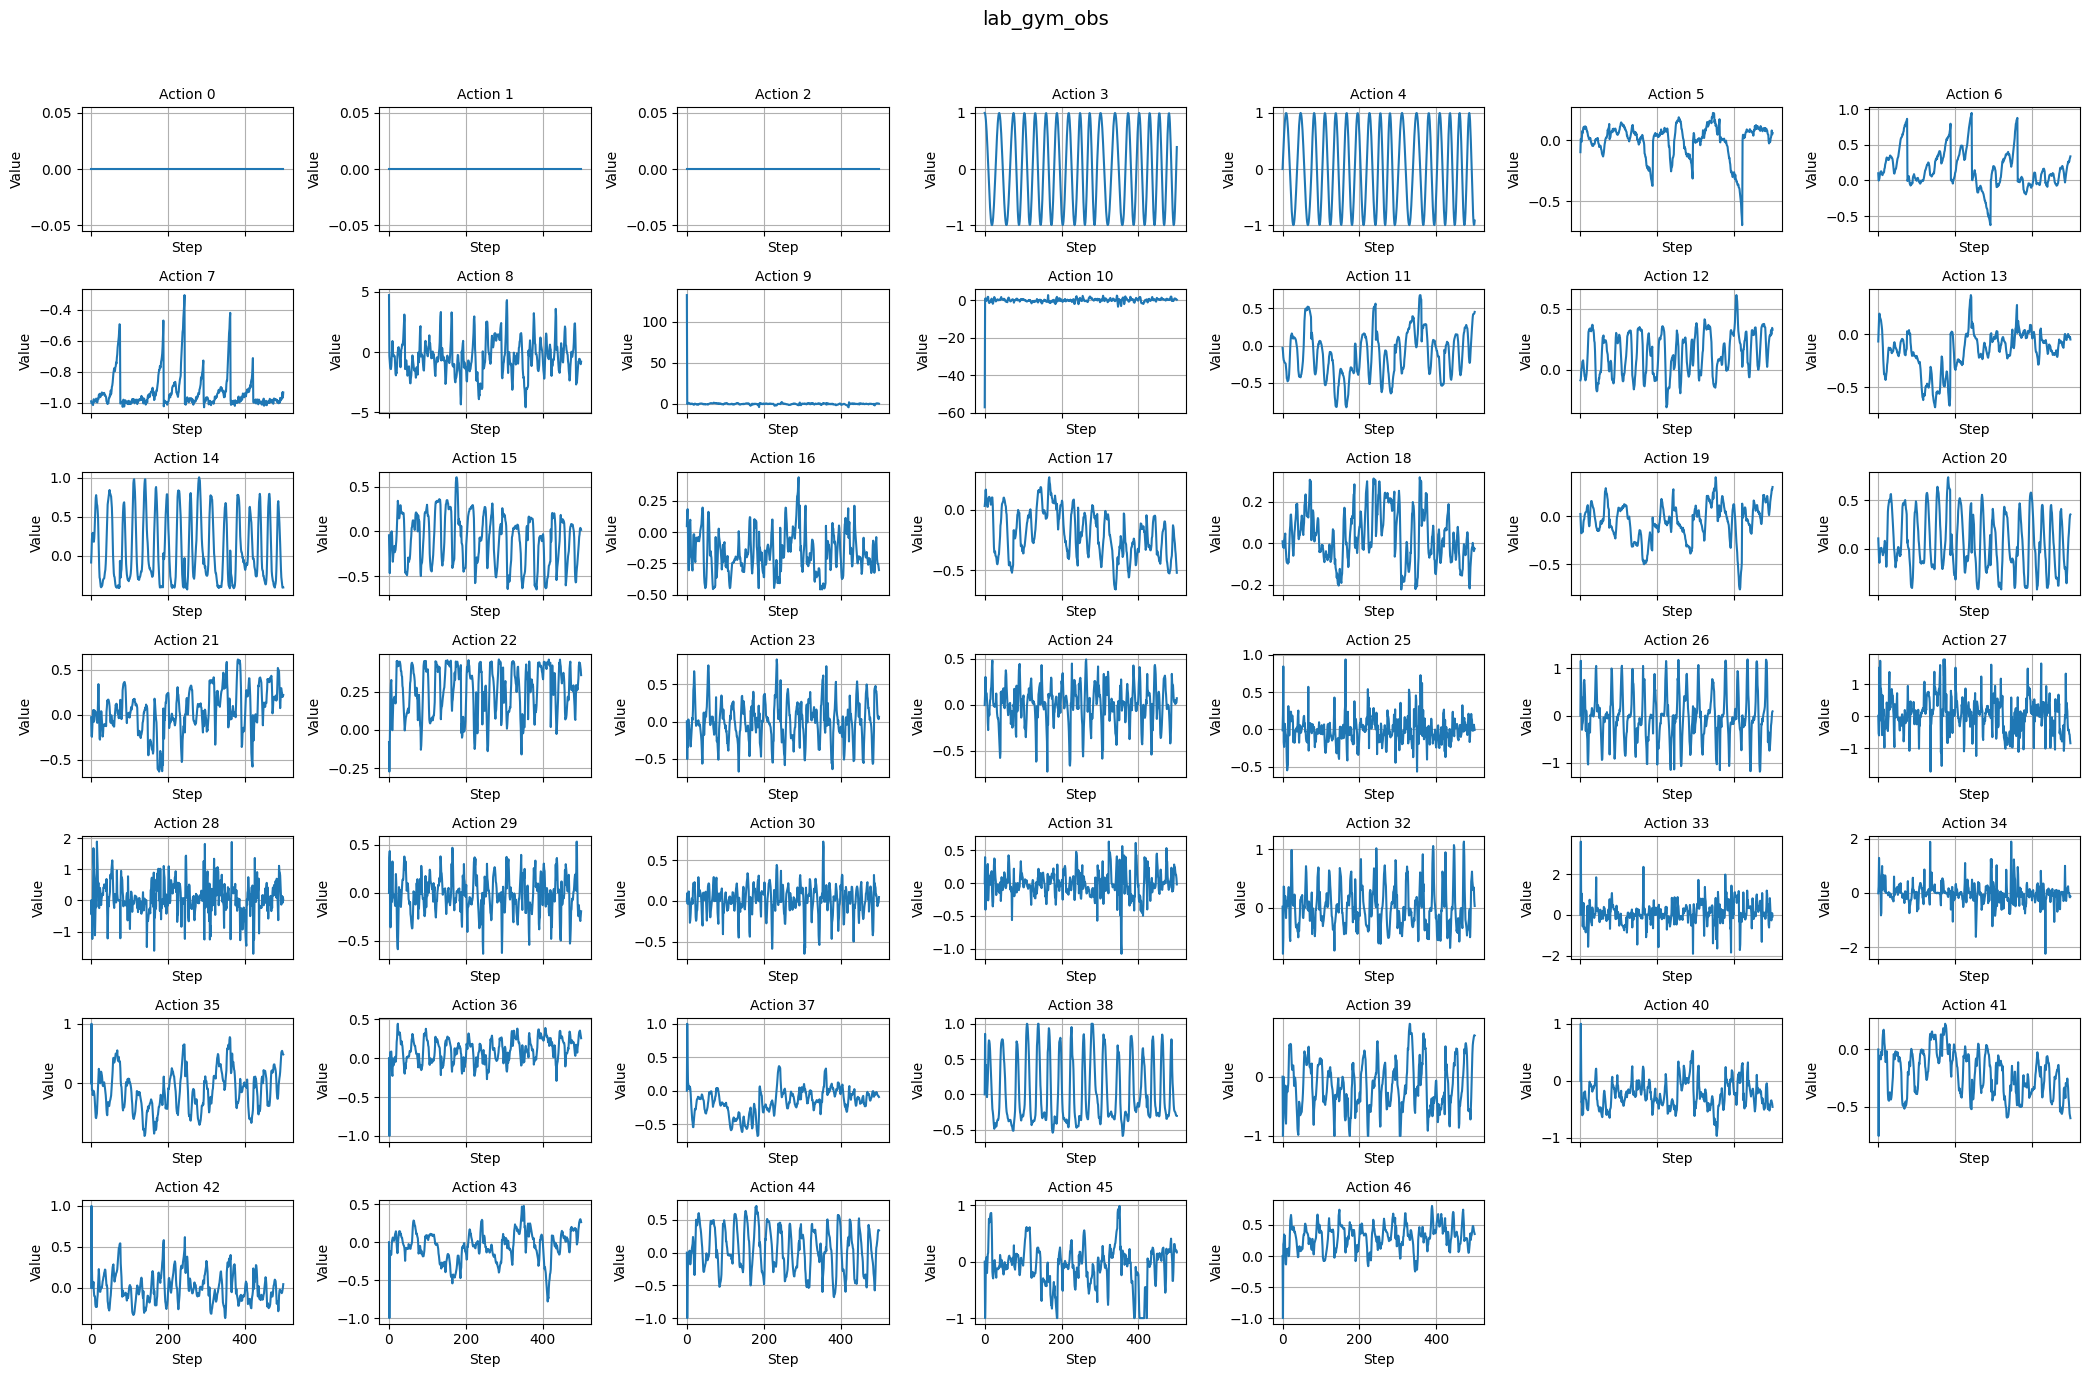

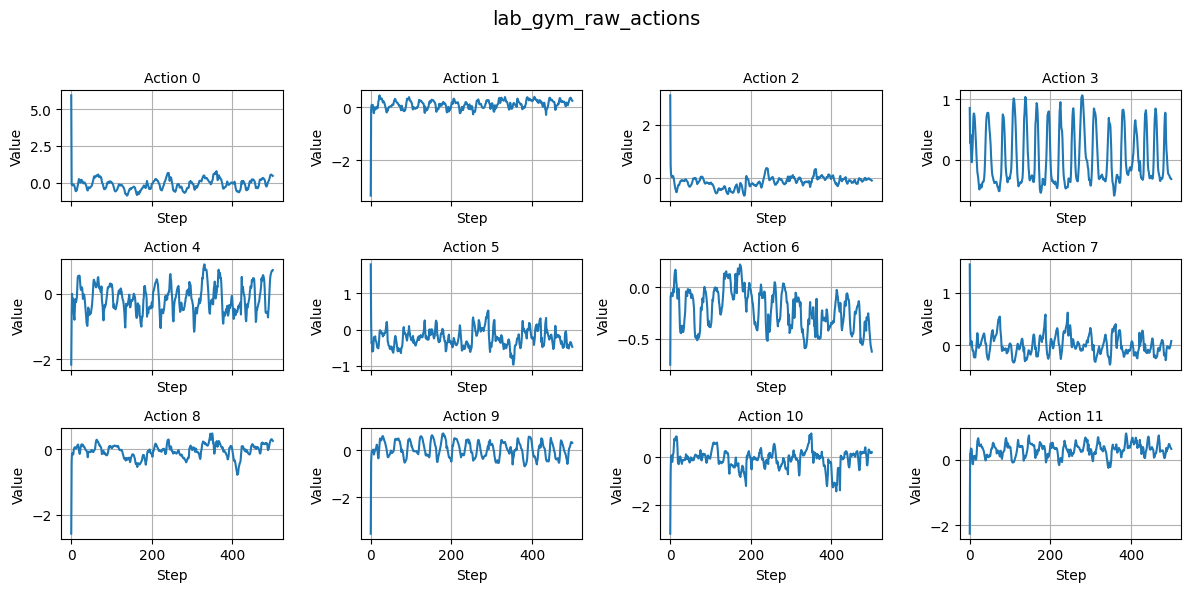

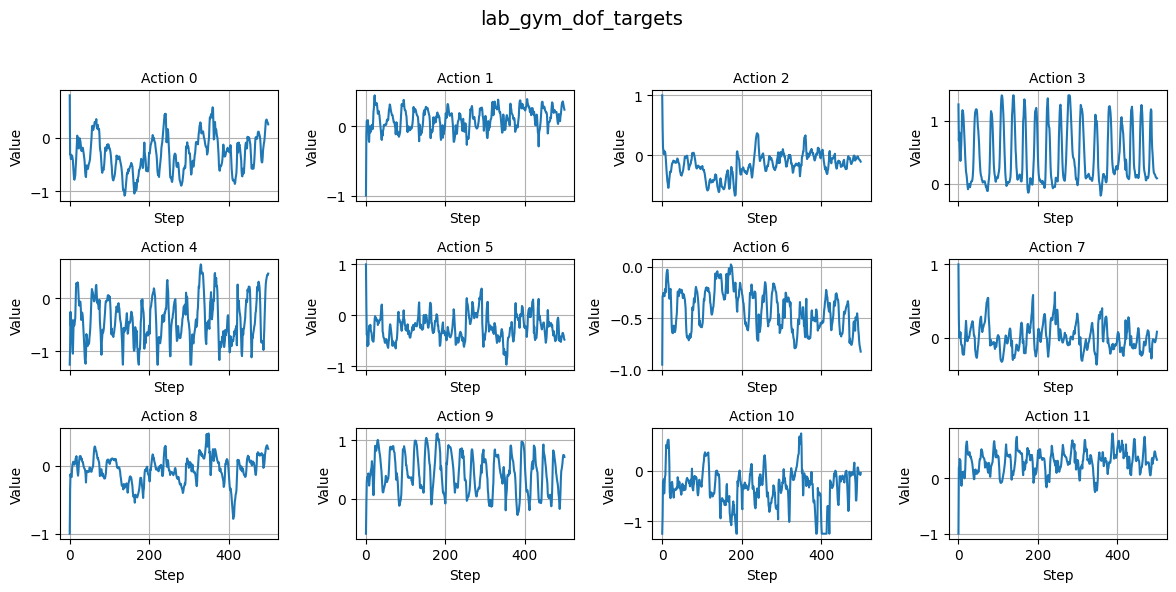

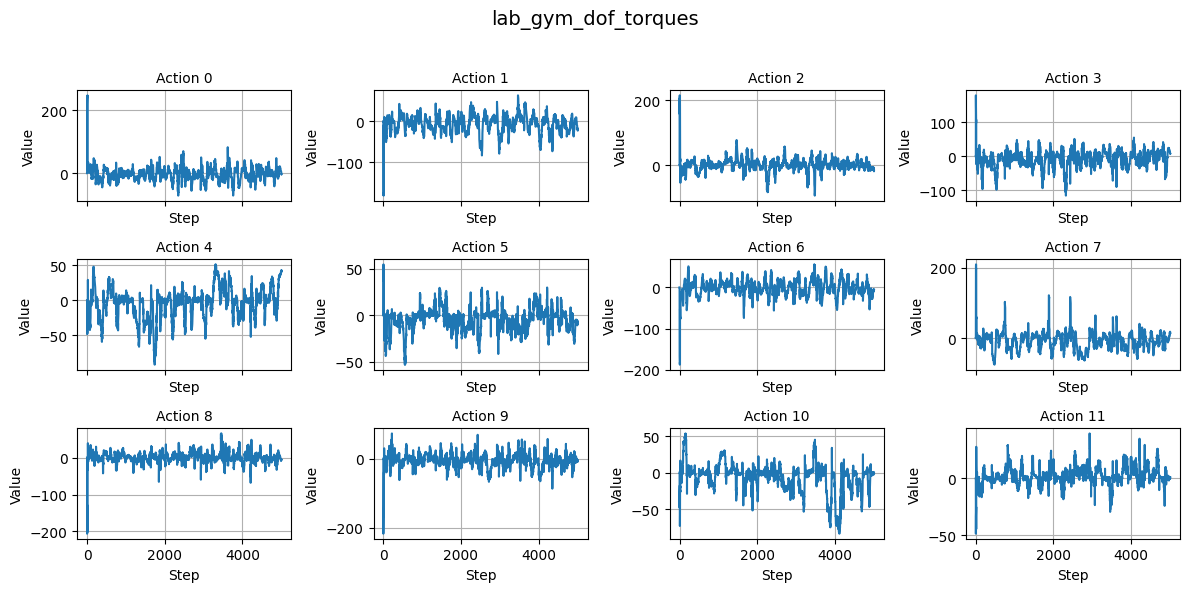

In [30]:
plot_actions(obs, name = "lab_gym_obs")
plot_actions(raw_actions,  name = "lab_gym_raw_actions")
plot_actions(dof_targets,  name = "lab_gym_dof_targets")
plot_actions(dof_torques,  name = "lab_gym_dof_torques")

In [9]:
import json
action_obs_fname = "../obs_action2.json"
torque_fname = "../torque_lab_lab2.json"
# action_obs_fname = "../obs_action_gym_lab.json"
# torque_fname = "../torque_gym_lab.json"
with open(action_obs_fname, 'r') as f1:
    a = json.load(f1)
with open(torque_fname, 'r') as f2:
    t = json.load(f2)

In [10]:
len(a['obs'])
len(t)
# obs = a['obs'][0:-1:2]
# act = a['obs'][1:-1:2]

3

saved to lab_lab_obs
saved to lab_lab_act


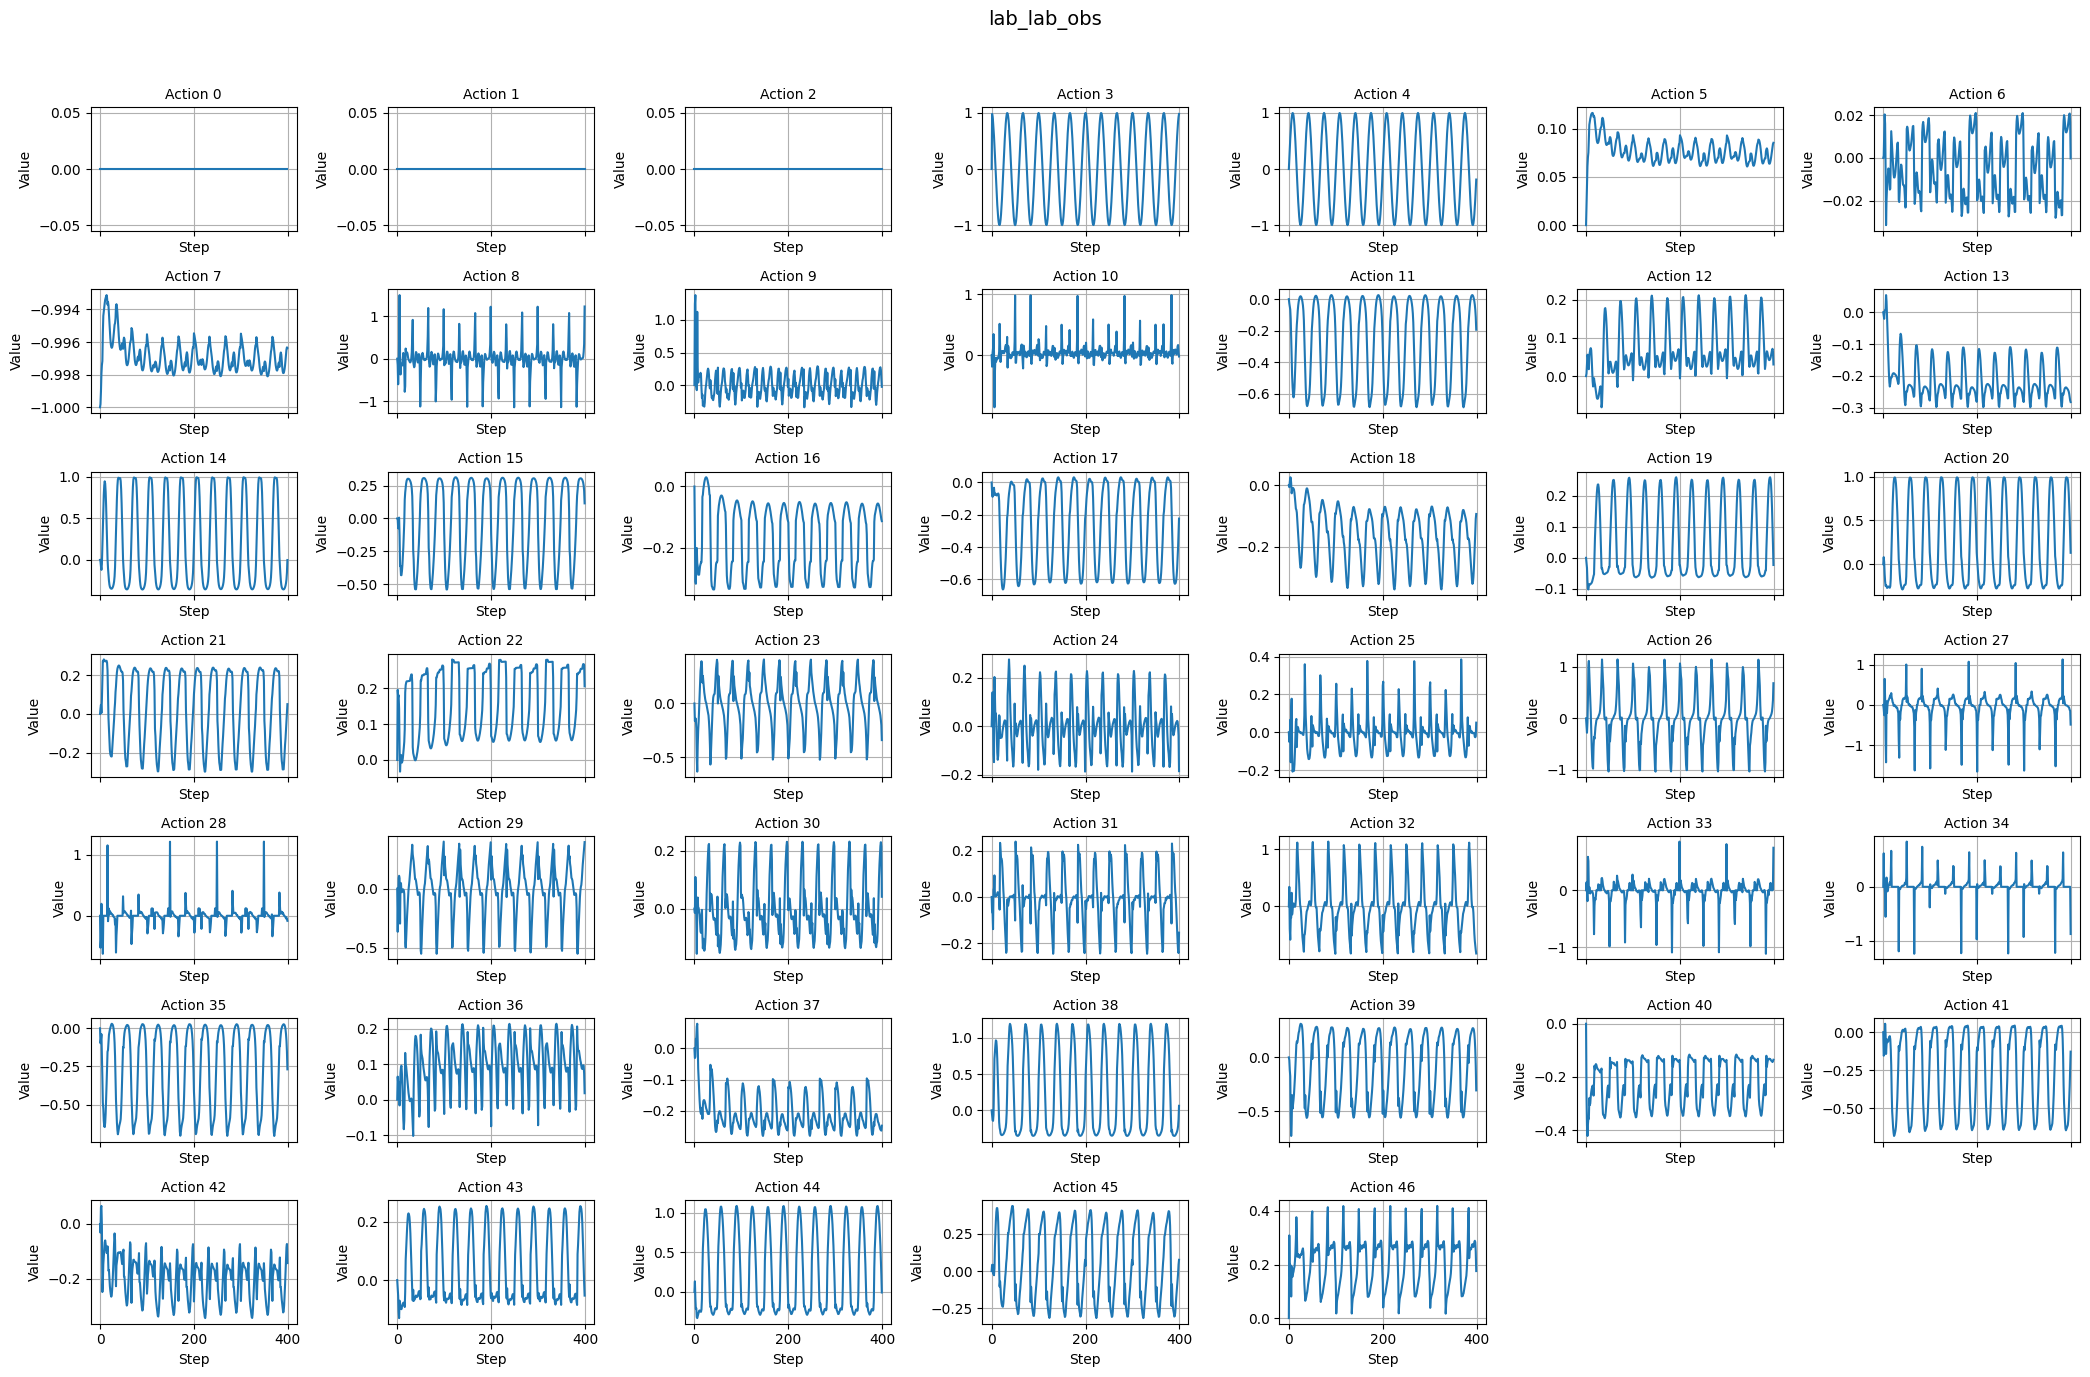

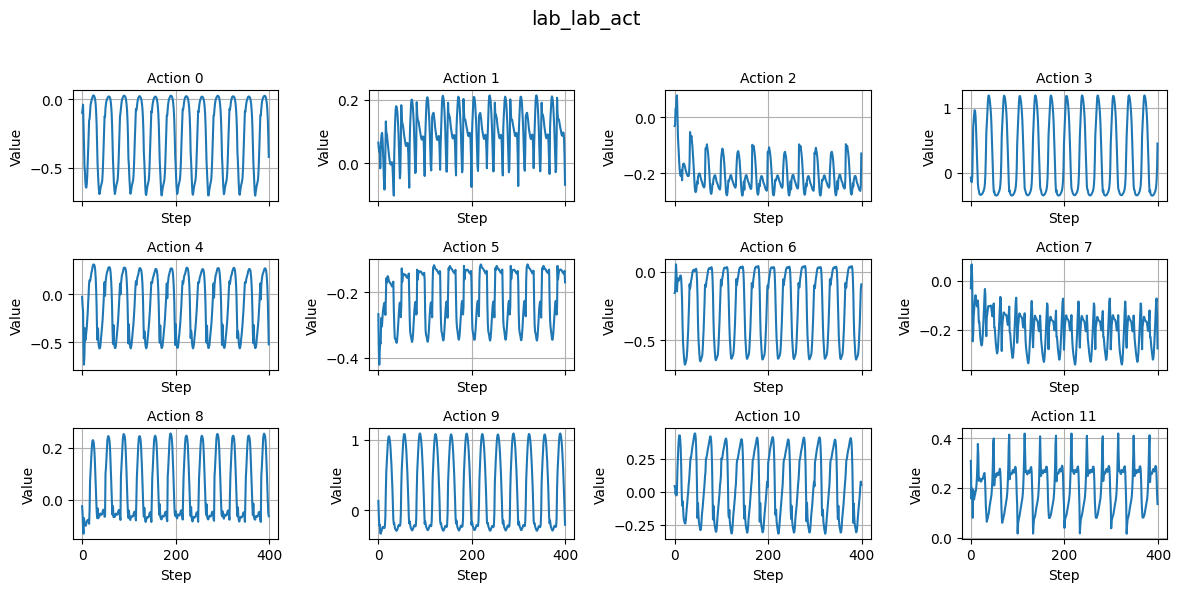

In [11]:
import numpy as np

obs = a["obs"]
act = a["actions"]
obs = np.squeeze(np.array(obs))
act = np.squeeze(np.array(act))

# Define index ranges for each component
# idx_gravity = slice(0, 3)
# idx_ang_vel = slice(3, 6)
# idx_commands = slice(6, 9)
# idx_gait = slice(9, 11)
# idx_dof_pos = slice(11, 23)
# idx_dof_vel = slice(23, 35)
# idx_actions = slice(35, 47)

# # Rearranged order
# reordered_indices = np.concatenate([
#     np.arange(*idx_commands.indices(obs.shape[-1])),
#     np.arange(*idx_gait.indices(obs.shape[-1])),
#     np.arange(*idx_gravity.indices(obs.shape[-1])),
#     np.arange(*idx_ang_vel.indices(obs.shape[-1])),
#     np.arange(*idx_dof_pos.indices(obs.shape[-1])),
#     np.arange(*idx_dof_vel.indices(obs.shape[-1])),
#     np.arange(*idx_actions.indices(obs.shape[-1])),
# ])

# obs = obs[..., reordered_indices]

# Now plot
plot_actions(obs, name="lab_lab_obs")
plot_actions(act, name="lab_lab_act")


saved to lab_lab_dof_targets


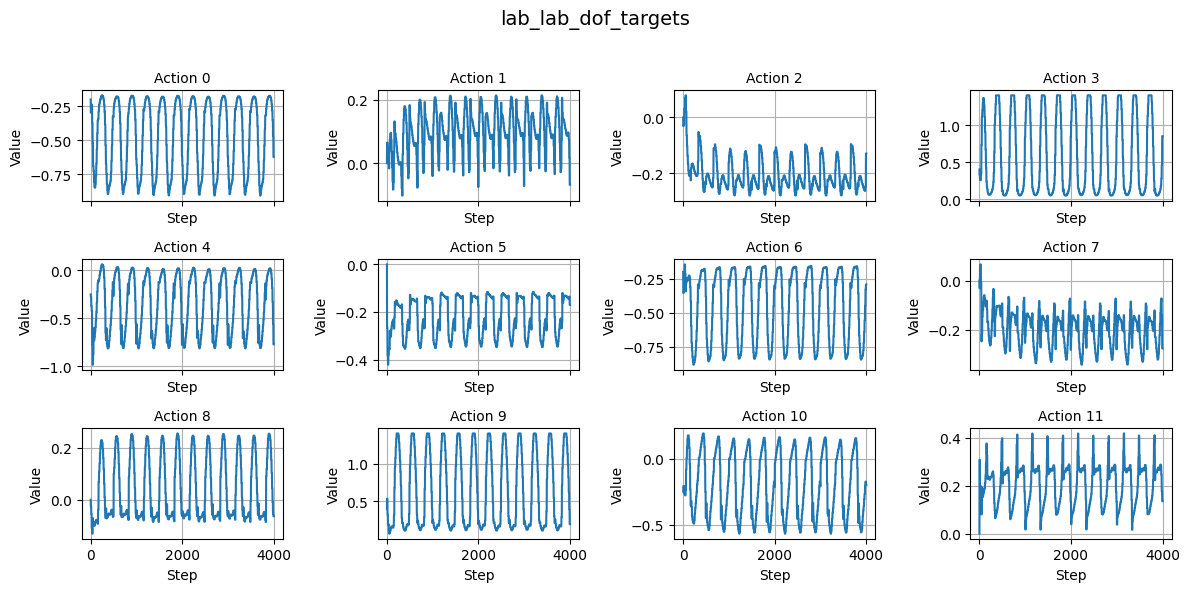

In [18]:
# dict_keys(['applied_effort', 'computed_effort', 'dof_targets'])
data = t["dof_targets"]
grouped = [data[i:i+4] for i in range(0, len(data), 4)]
flattened = [np.concatenate([np.ravel(x) for x in gr]) for gr in grouped]
flattened[0]
# Define your desired index order
order = [0, 2, 4, 6, 8, 10, 1, 3, 5, 7, 9, 11]
# Apply reordering to each group
reordered_groups = [g[order] for g in flattened]
# plot_actions(reordered_groups, name="trained_gym_deploy_lab_applied_effort")
plot_actions(reordered_groups, name="lab_lab_dof_targets")

